In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import streamlit as st
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

In [2]:
data = pd.read_excel(r"E:\Project\marketing_campaign.xlsx")

In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
data.drop('ID', axis = 1, inplace = True)

In [6]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
data['Income'] = data['Income'].fillna(data['Income'].median())

In [8]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
data.duplicated().sum()

182

In [10]:
data.drop_duplicates(inplace = True)

In [11]:
data.shape

(2058, 28)

### EDA

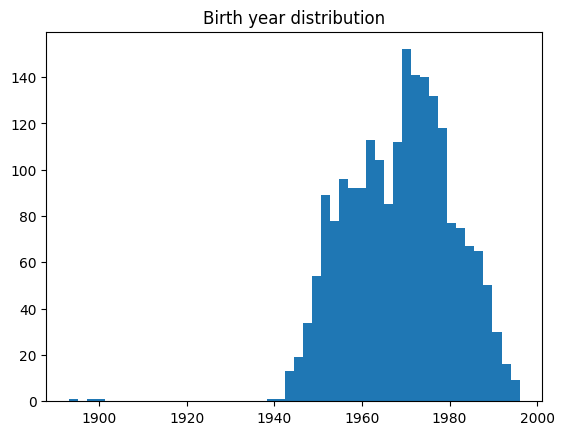

In [12]:
plt.hist(data['Year_Birth'], bins = 50)
plt.title('Birth year distribution');

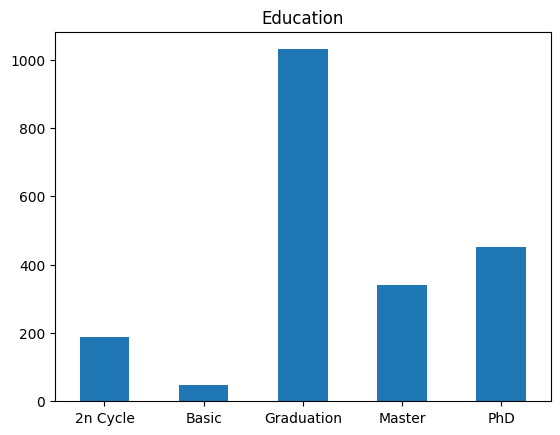

In [13]:
data['Education'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Education');

In [14]:
# Remove rows with irrelevant marital status values: 'Absurd', 'YOLO', and 'alone'
data = data[~data['Marital_Status'].isin(['Absurd', 'YOLO', 'Alone'])].reset_index(drop=True)

In [15]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,...,6,0,0,0,0,0,0,3,11,0
2047,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2048,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2049,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,3,0,0,0,0,0,0,3,11,0


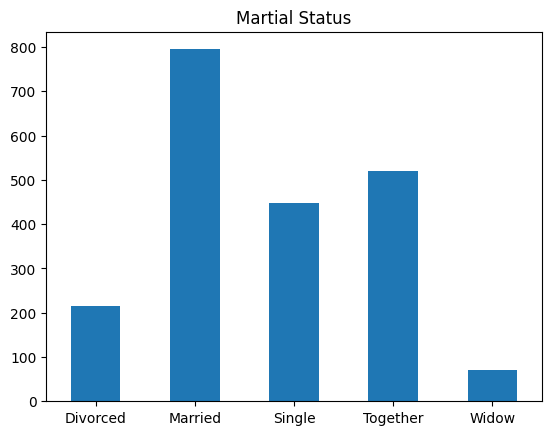

In [16]:
data['Marital_Status'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Martial Status');

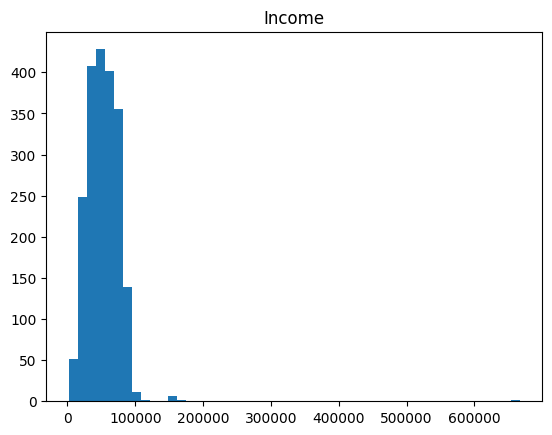

In [17]:
plt.hist(data['Income'],bins = 50)
plt.title('Income');

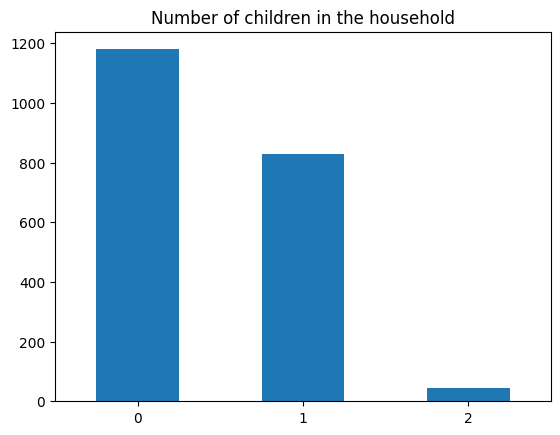

In [18]:
data['Kidhome'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Number of children in the household');

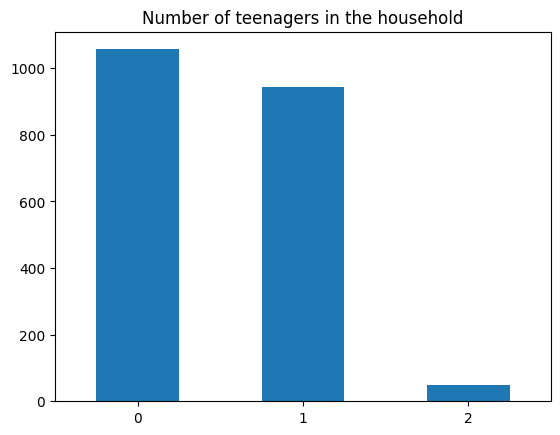

In [19]:
data['Teenhome'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Number of teenagers in the household');

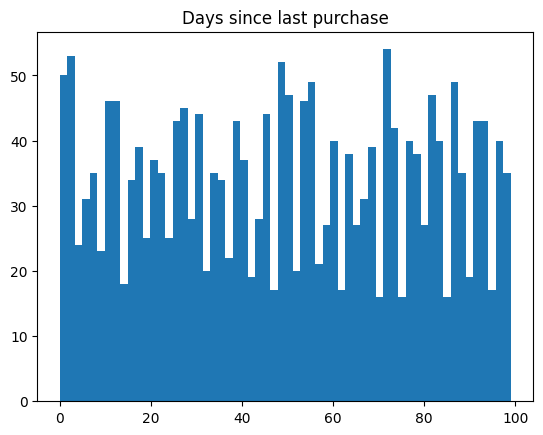

In [20]:
plt.hist(data['Recency'], bins = 60)
plt.title('Days since last purchase');

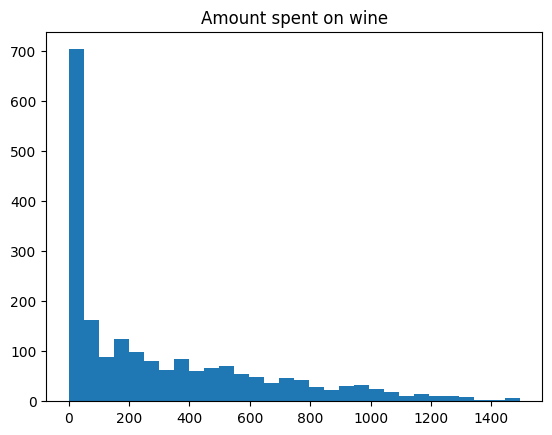

In [21]:
plt.hist(data['MntWines'], bins = 30)
plt.title('Amount spent on wine');

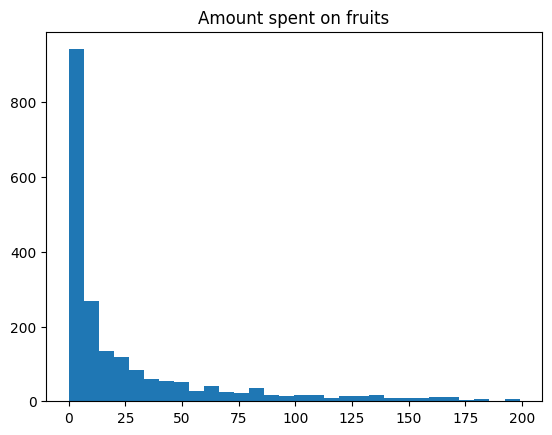

In [22]:
plt.hist(data['MntFruits'], bins = 30)
plt.title('Amount spent on fruits');

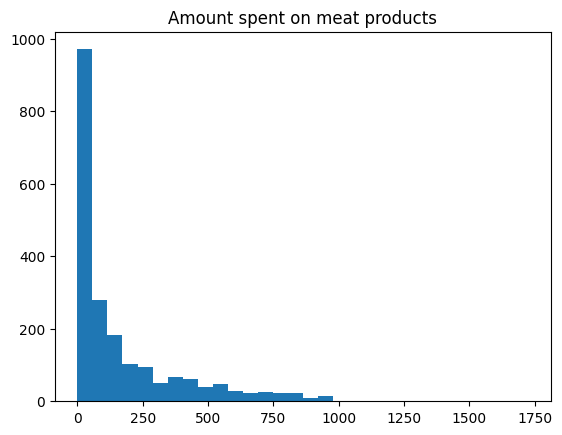

In [23]:
plt.hist(data['MntMeatProducts'], bins = 30)
plt.title('Amount spent on meat products');

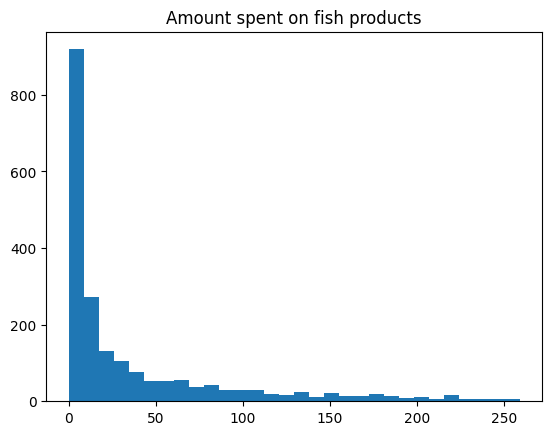

In [24]:
plt.hist(data['MntFishProducts'], bins = 30)
plt.title('Amount spent on fish products');

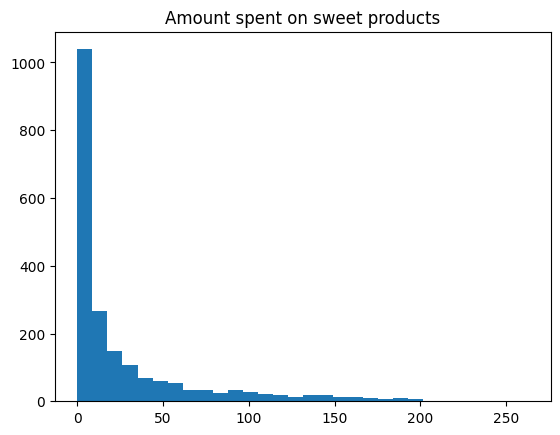

In [25]:
plt.hist(data['MntSweetProducts'], bins = 30)
plt.title('Amount spent on sweet products');

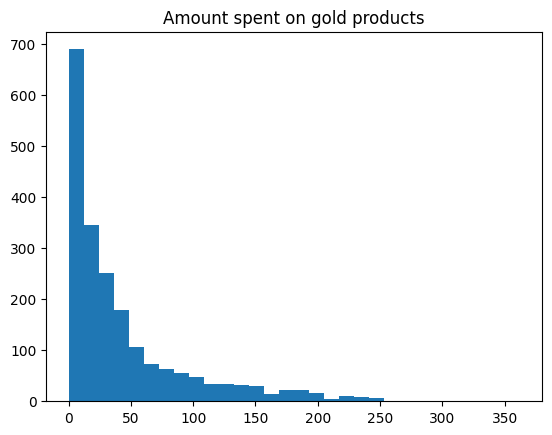

In [26]:
plt.hist(data['MntGoldProds'], bins = 30)
plt.title('Amount spent on gold products');

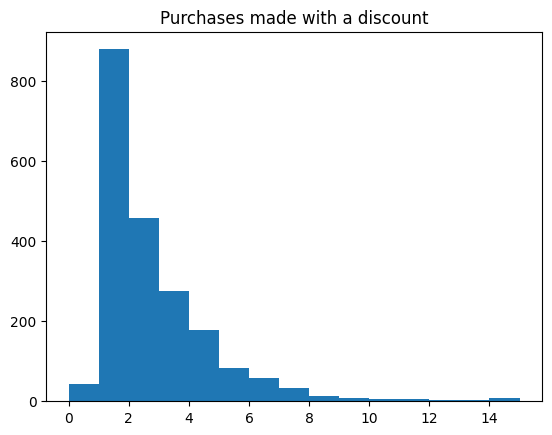

In [27]:
plt.hist(data['NumDealsPurchases'], bins = 15)
plt.title('Purchases made with a discount');

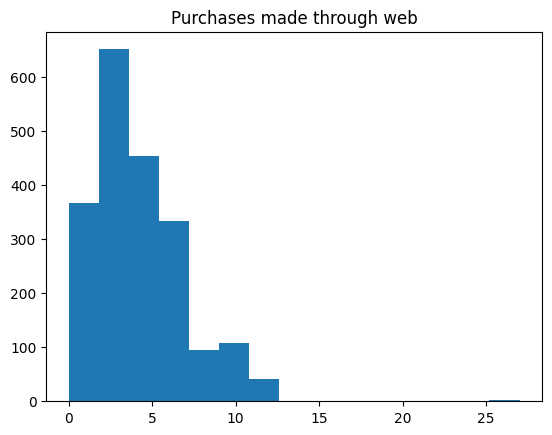

In [28]:
plt.hist(data['NumWebPurchases'], bins = 15)
plt.title('Purchases made through web');

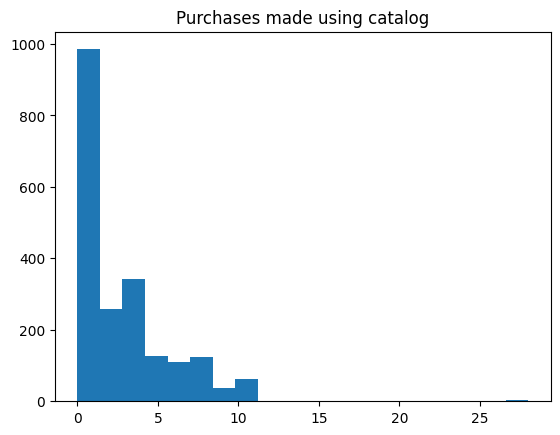

In [29]:
plt.hist(data['NumCatalogPurchases'], bins = 20)
plt.title('Purchases made using catalog');

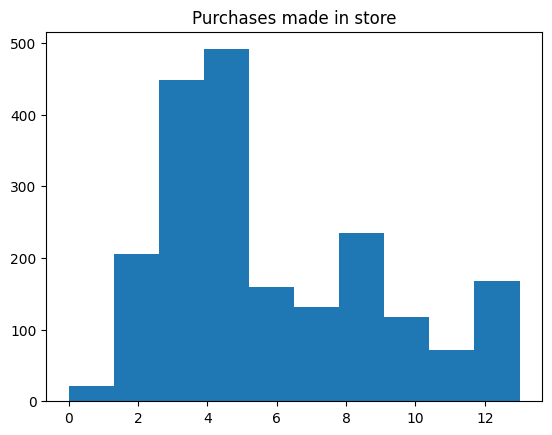

In [30]:
plt.hist(data['NumStorePurchases'])
plt.title('Purchases made in store');

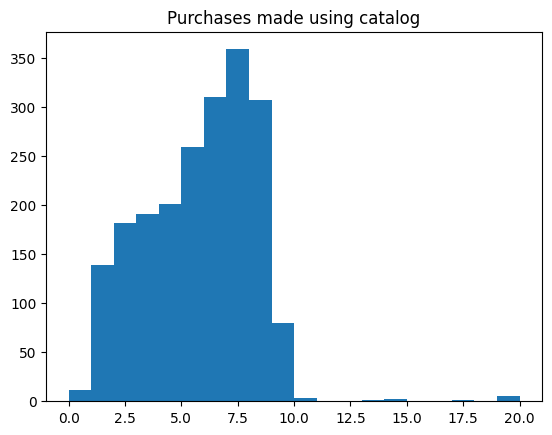

In [31]:
plt.hist(data['NumWebVisitsMonth'], bins = 20)
plt.title('Purchases made using catalog');

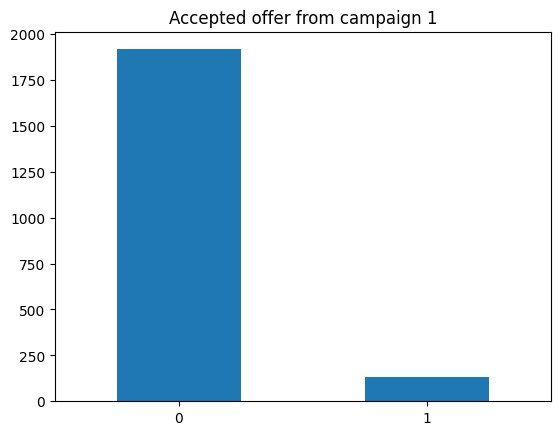

In [32]:
data['AcceptedCmp1'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Accepted offer from campaign 1');

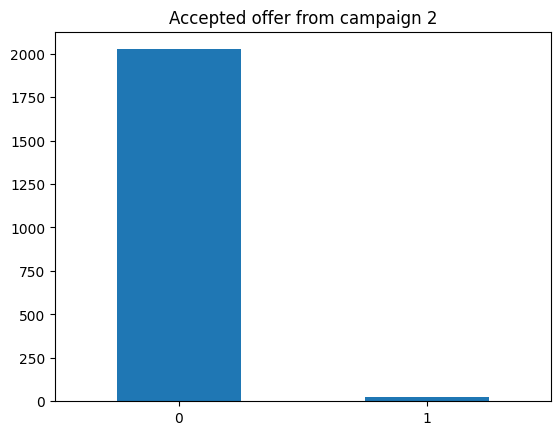

In [33]:
data['AcceptedCmp2'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Accepted offer from campaign 2');

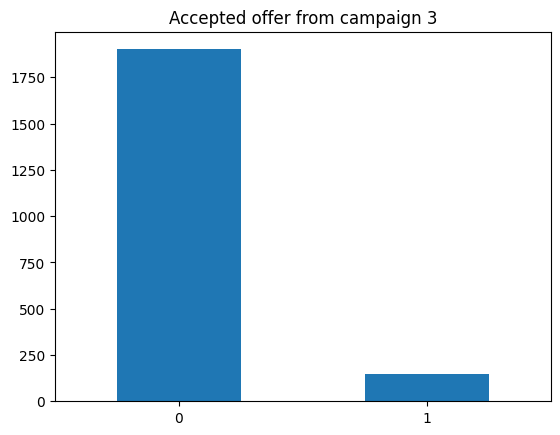

In [34]:
data['AcceptedCmp3'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Accepted offer from campaign 3');

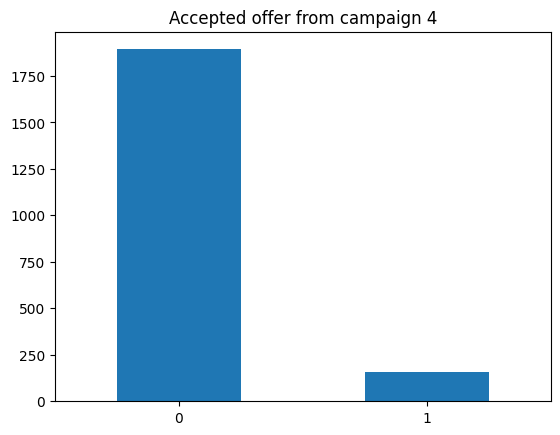

In [35]:
data['AcceptedCmp4'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Accepted offer from campaign 4');

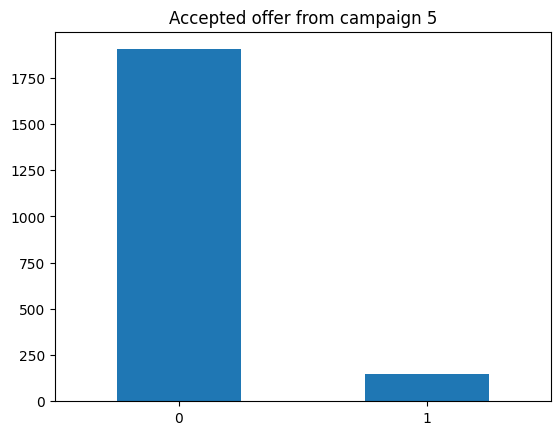

In [36]:
data['AcceptedCmp5'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Accepted offer from campaign 5');

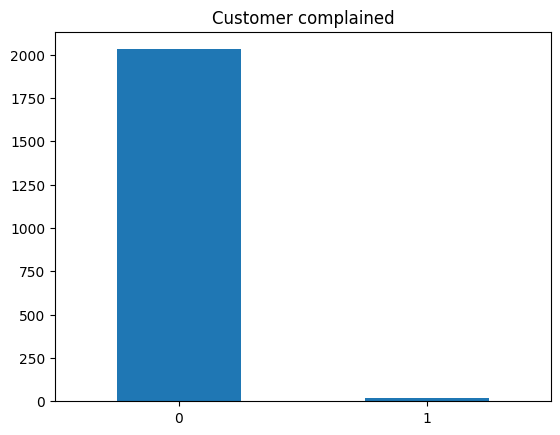

In [37]:
data['Complain'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Customer complained');

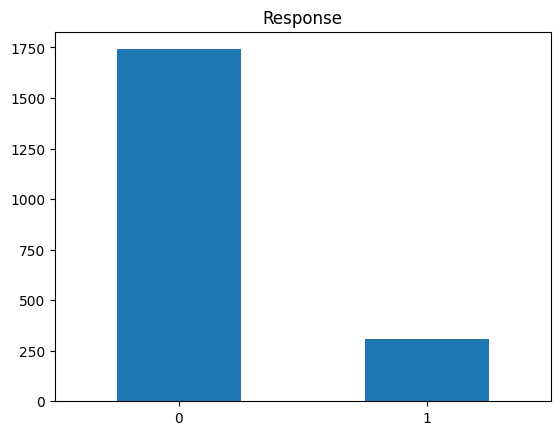

In [38]:
data['Response'].value_counts().sort_index().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Response');

<Axes: >

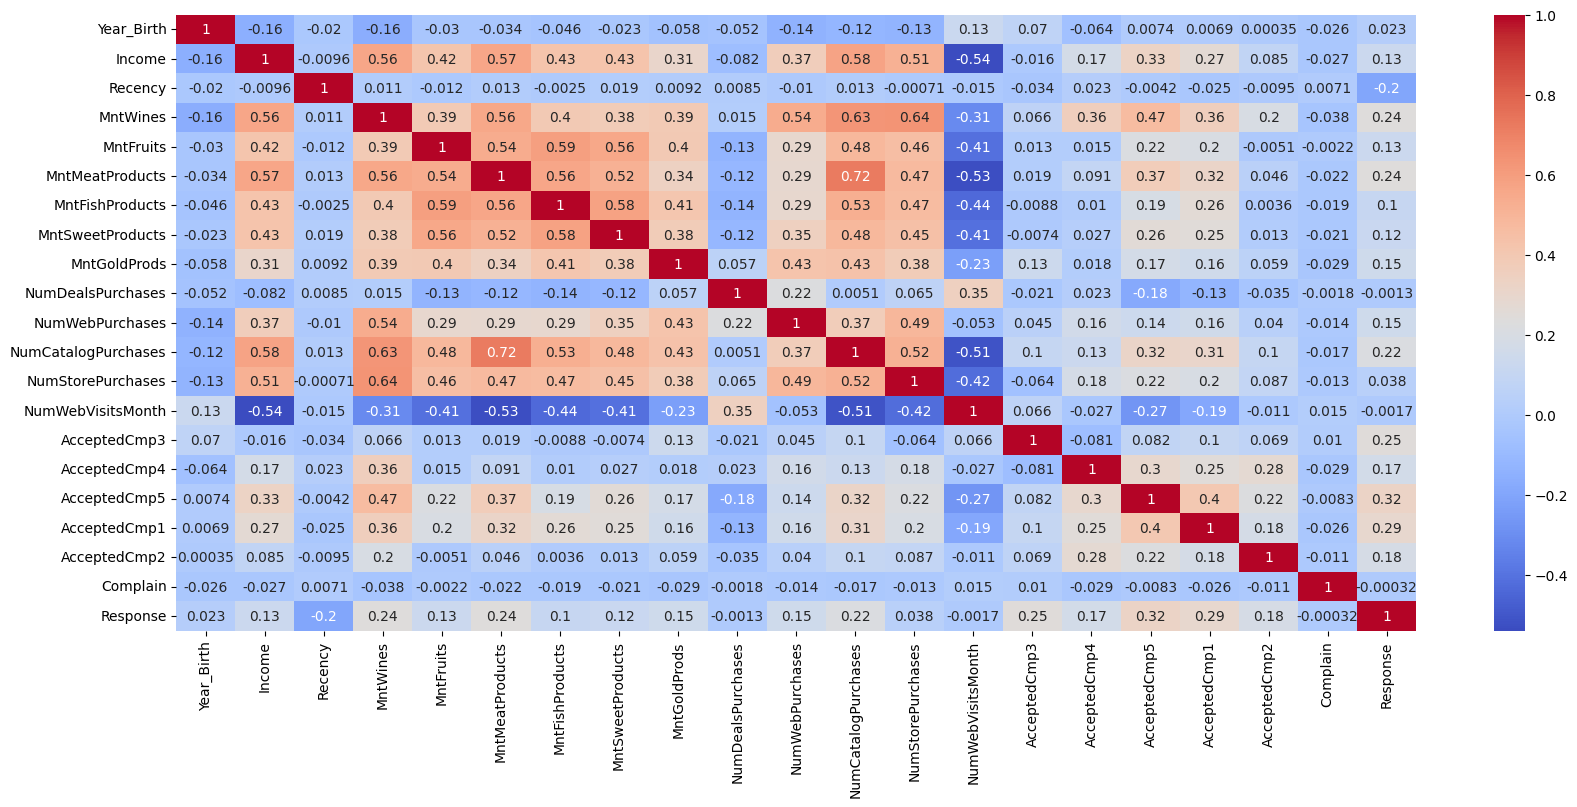

In [39]:
plt.figure(figsize = (20,8))
columns = data.drop(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer',
                     'Z_CostContact', 'Z_Revenue'], axis = 1).columns
sns.heatmap(data[columns].corr(), annot = True, cmap = 'coolwarm')

<Axes: >

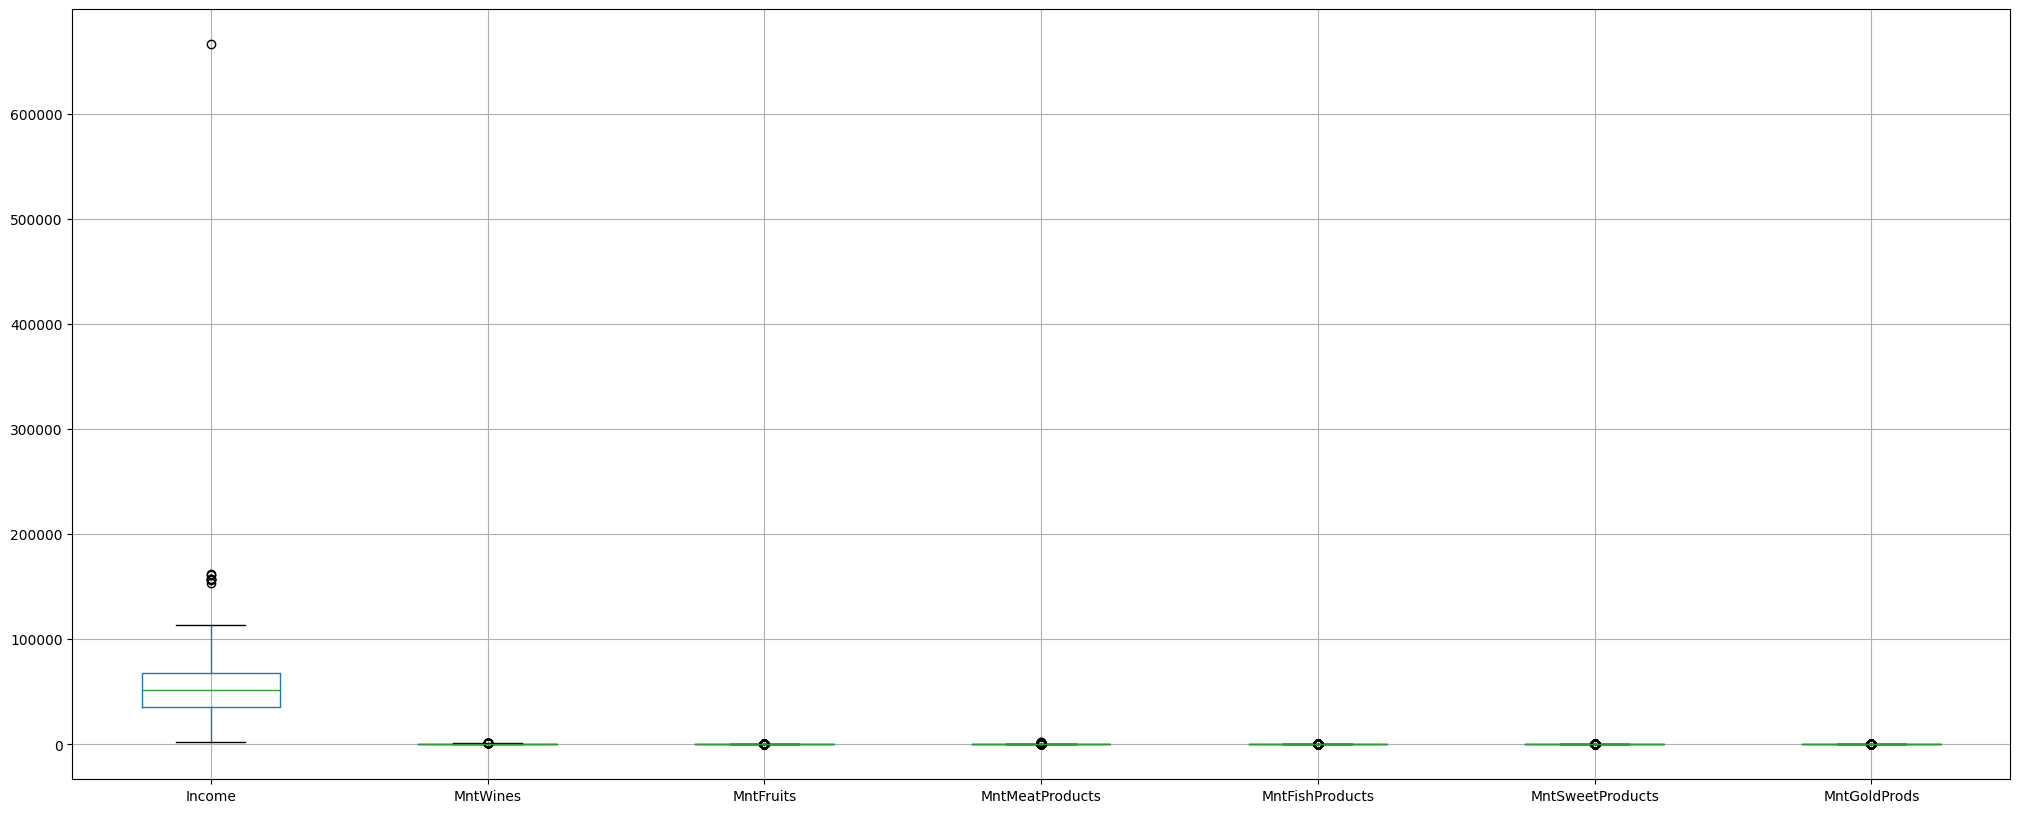

In [40]:
plt.figure(figsize = (25,10))
columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
           'MntSweetProducts', 'MntGoldProds']
data[columns].boxplot()

In [41]:
data[columns].nunique()

Income              1973
MntWines             775
MntFruits            158
MntMeatProducts      558
MntFishProducts      182
MntSweetProducts     177
MntGoldProds         212
dtype: int64

In [42]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,...,6,0,0,0,0,0,0,3,11,0
2047,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2048,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2049,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,3,0,0,0,0,0,0,3,11,0


In [43]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [44]:
def capping(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (2 * IQR)
        upper_bound = Q3 + (2 * IQR)
        data[col] = data[col].clip(lower = lower_bound, upper = upper_bound)

In [45]:
capping(data, ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
           'MntSweetProducts', 'MntGoldProds'])

<Axes: >

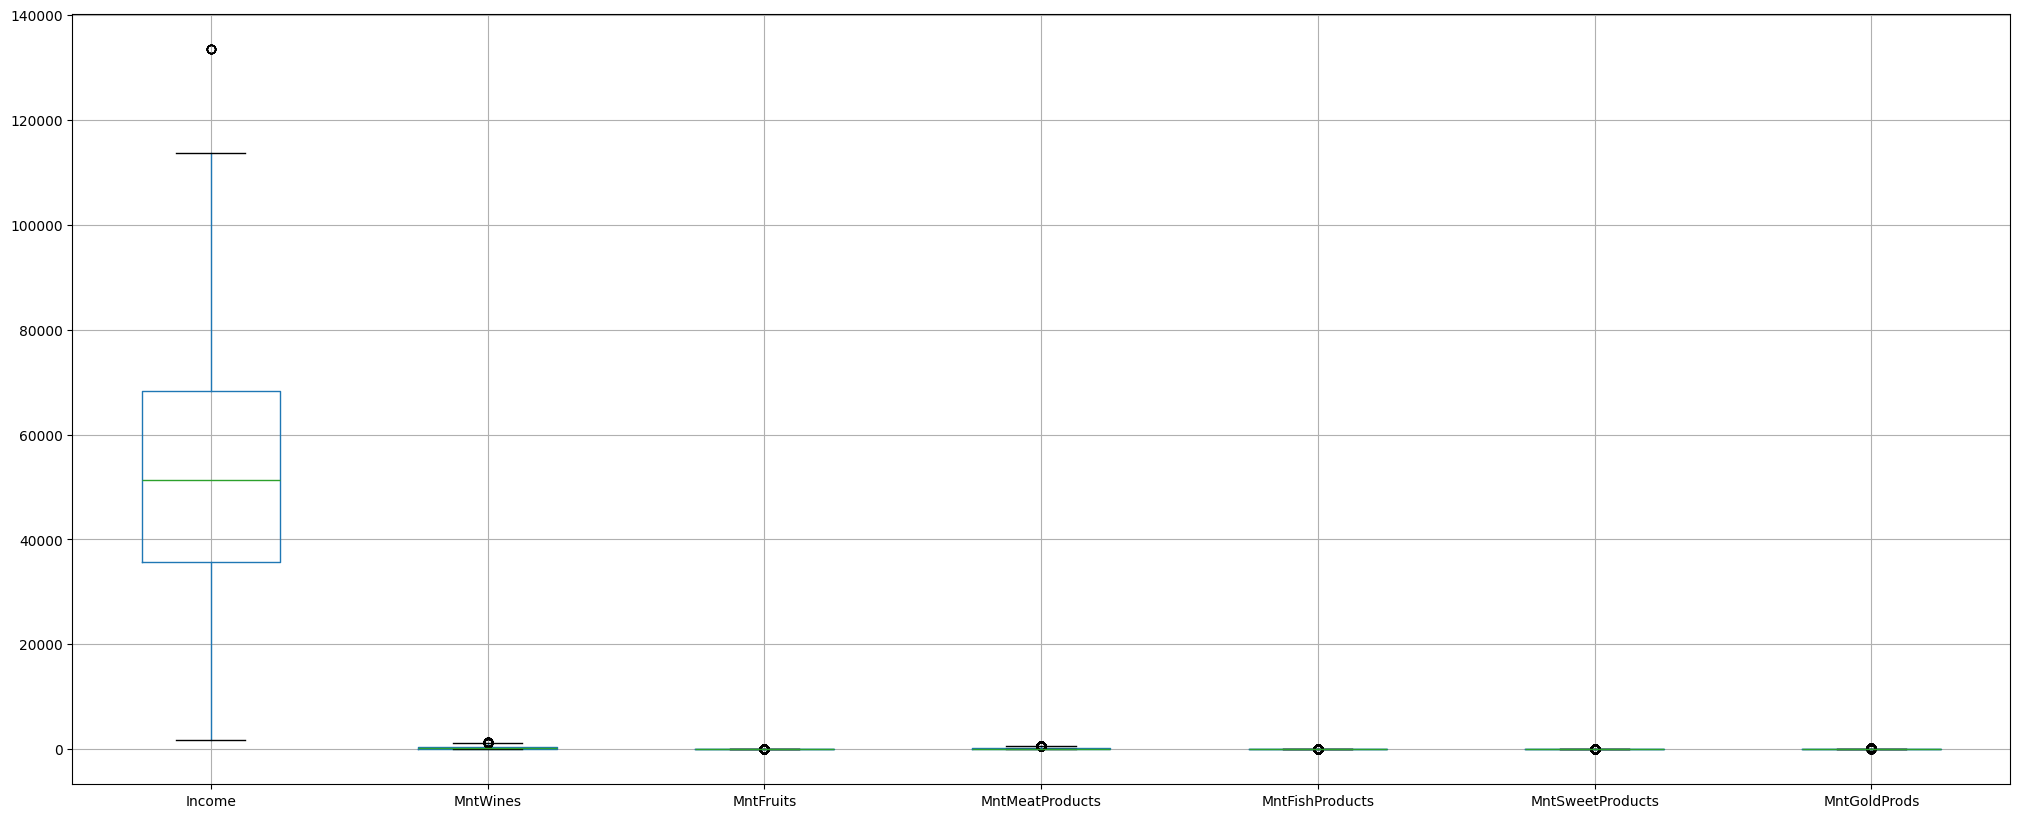

In [46]:
plt.figure(figsize = (25,10))
columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
           'MntSweetProducts', 'MntGoldProds']
data[columns].boxplot()

In [47]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426.0,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11.0,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1977,Graduation,Together,133443.5,1,0,2013-06-02,23,9.0,14,...,6,0,0,0,0,0,0,3,11,0
2047,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709.0,43,...,5,0,0,0,0,0,0,3,11,0
2048,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908.0,48,...,6,0,1,0,0,0,0,3,11,0
2049,1956,Master,Together,69245.0,0,1,2014-01-24,8,428.0,30,...,3,0,0,0,0,0,0,3,11,0


### Feature Engineering

In [48]:
# Creating age column from year_birth column
reference_year = 2014
data['Age'] = reference_year - data['Year_Birth']

In [49]:
# Some values can be higher than 100 or lower than 18 that can be data entry errors
data['Age'] = data['Age'].clip(lower=18, upper=100)

In [50]:
# Dropping the irrelevant columns for model building
data.drop(['Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis = 1, inplace = True)

In [51]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,58,635.0,88,546,144,...,4,7,0,0,0,0,0,0,1,57
1,Graduation,Single,46344.0,1,1,38,11.0,1,6,2,...,2,5,0,0,0,0,0,0,0,60
2,Graduation,Together,71613.0,0,0,26,426.0,49,127,111,...,10,4,0,0,0,0,0,0,0,49
3,Graduation,Together,26646.0,1,0,26,11.0,4,20,10,...,4,6,0,0,0,0,0,0,0,30
4,PhD,Married,58293.0,1,0,94,173.0,43,118,46,...,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,Graduation,Together,133443.5,1,0,23,9.0,14,18,8,...,3,6,0,0,0,0,0,0,0,37
2047,Graduation,Married,61223.0,0,1,46,709.0,43,182,42,...,4,5,0,0,0,0,0,0,0,47
2048,Graduation,Divorced,56981.0,0,0,91,908.0,48,217,32,...,13,6,0,1,0,0,0,0,0,33
2049,Master,Together,69245.0,0,1,8,428.0,30,214,80,...,10,3,0,0,0,0,0,0,0,58


In [52]:
pipe_df = data.drop('Response', axis = 1) # For pipeline use

In [53]:
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'], drop_first = True).astype(int)

In [54]:
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138,0,0,58,635,88,546,144,88,88,...,1,57,0,1,0,0,0,1,0,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,60,0,1,0,0,0,1,0,0
2,71613,0,0,26,426,49,127,111,21,42,...,0,49,0,1,0,0,0,0,1,0
3,26646,1,0,26,11,4,20,10,3,5,...,0,30,0,1,0,0,0,0,1,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,33,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,133443,1,0,23,9,14,18,8,1,12,...,0,37,0,1,0,0,0,0,1,0
2047,61223,0,1,46,709,43,182,42,100,150,...,0,47,0,1,0,0,1,0,0,0
2048,56981,0,0,91,908,48,217,32,12,24,...,0,33,0,1,0,0,0,0,0,0
2049,69245,0,1,8,428,30,214,80,30,61,...,0,58,0,0,1,0,0,0,1,0


In [55]:
log_col = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
           'MntSweetProducts', 'MntGoldProds', 'Age', 'NumDealsPurchases',
           'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
data[log_col] = np.log1p(data[log_col])

In [56]:
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,10.970592,0,0,4.077537,6.455199,4.488636,6.304449,4.976734,4.488636,4.488636,...,1,4.060443,0,1,0,0,0,1,0,0
1,10.743869,1,1,3.663562,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,...,0,4.110874,0,1,0,0,0,1,0,0
2,11.179046,0,0,3.295837,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,...,0,3.912023,0,1,0,0,0,0,1,0
3,10.190432,1,0,3.295837,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,...,0,3.433987,0,1,0,0,0,0,1,0
4,10.973254,1,0,4.553877,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,...,0,3.526361,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,11.801437,1,0,3.178054,2.302585,2.708050,2.944439,2.197225,0.693147,2.564949,...,0,3.637586,0,1,0,0,0,0,1,0
2047,11.022295,0,1,3.850148,6.565265,3.784190,5.209486,3.761200,4.615121,5.017280,...,0,3.871201,0,1,0,0,1,0,0,0
2048,10.950491,0,0,4.521789,6.812345,3.891820,5.384495,3.496508,2.564949,3.218876,...,0,3.526361,0,1,0,0,0,0,0,0
2049,11.145421,0,1,2.197225,6.061457,3.433987,5.370638,4.394449,3.433987,4.127134,...,0,4.077537,0,0,1,0,0,0,1,0


In [57]:
scale_col = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'Age', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
sc = StandardScaler()
data[scale_col] = sc.fit_transform(data[scale_col])

In [58]:
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.430252,0,0,0.485651,0.987596,1.492783,1.418362,1.518712,1.466365,1.097966,...,1,0.979500,0,1,0,0,0,1,0,0
1,-0.020626,1,1,0.054317,-1.212251,-0.994179,-1.404816,-0.860222,-0.977111,-0.910669,...,0,1.168180,0,1,0,0,0,1,0,0
2,0.844799,0,0,-0.328827,0.766843,1.114962,0.477579,1.360304,0.566616,0.523325,...,0,0.424207,0,1,0,0,0,0,1,0
3,-1.121230,1,0,-0.328827,-1.212251,-0.393787,-0.693207,-0.063211,-0.530874,-1.032441,...,0,-1.364300,0,1,0,0,0,0,1,0
4,0.435547,1,0,0.981964,0.269433,1.031200,0.430355,0.827636,0.721872,-0.257632,...,0,-1.018697,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2.082531,1,0,-0.451549,-1.313271,0.326069,-0.758034,-0.186307,-0.977111,-0.421657,...,0,-0.602562,0,1,0,0,0,0,1,0
2047,0.533072,0,1,0.248727,1.048581,1.031200,0.709116,0.773074,1.547793,1.515569,...,0,0.271477,0,1,0,0,1,0,0,0
2048,0.390278,0,0,0.948530,1.185482,1.101724,0.822475,0.610705,0.227925,0.094914,...,0,-1.018697,0,1,0,0,0,0,0,0
2049,0.777929,0,1,-1.473505,0.769433,0.801733,0.813500,1.161524,0.787398,0.812396,...,0,1.043457,0,0,1,0,0,0,1,0


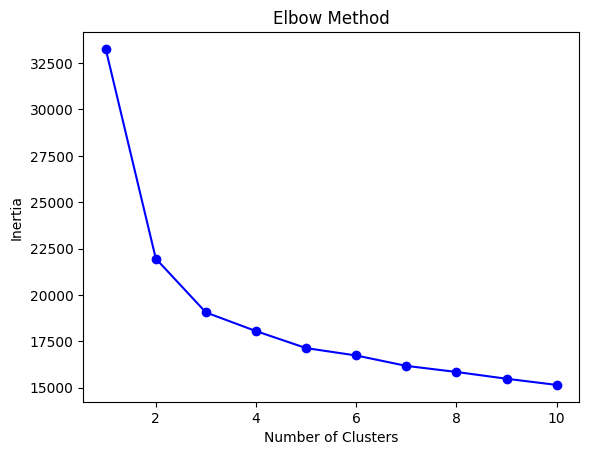

In [59]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
    inertia.append(kmeans.inertia_)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method');

### DBSCAN Clustering

In [60]:
pca = PCA(n_components = 2)
train = pca.fit_transform(data.drop('Response', axis = 1)) # Response can act as an target column

In [61]:
model = DBSCAN(eps = 0.2, min_samples = 5)
db_labels = model.fit_predict(train)

# Exclude noise points labeled as -1
mask = db_labels != -1

if len(set(db_labels[mask])) > 1:
    sil_score = silhouette_score(train[mask], db_labels[mask])
    print("Silhouette Score :", sil_score)
    print("Davies-Bouldin Index:", davies_bouldin_score(train[mask], db_labels[mask]))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(train[mask], db_labels[mask]))
else:
    print("Not enough clusters to compute silhouette score")
    

Silhouette Score : -0.24345989283907896
Davies-Bouldin Index: 0.789833005015811
Calinski-Harabasz Index: 304.16995370150437


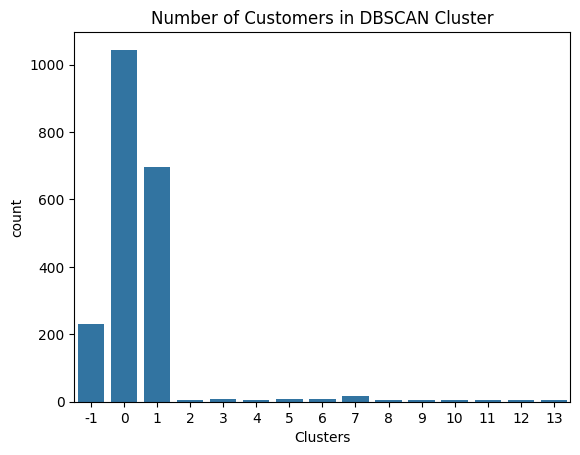

In [62]:
sns.countplot(data = data, x= pd.Series(db_labels))
plt.title("Number of Customers in DBSCAN Cluster");
plt.xlabel('Clusters');

### K-Means using dbscan

In [63]:
model1 = DBSCAN(eps = 0.5, min_samples = 5)
db_labels1 = model1.fit_predict(train)

# Exclude noise points labeled as -1
mask1 = db_labels1 != -1

In [64]:
kmeans = KMeans(n_clusters = 3,random_state = 42)
K_labels = kmeans.fit_predict(train[mask1])
print("Silhouette Score :", silhouette_score(train[mask1], K_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(train[mask1], K_labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(train[mask1], K_labels))

Silhouette Score : 0.5106067515261178
Davies-Bouldin Index: 0.7089836456053645
Calinski-Harabasz Index: 4094.614201387698


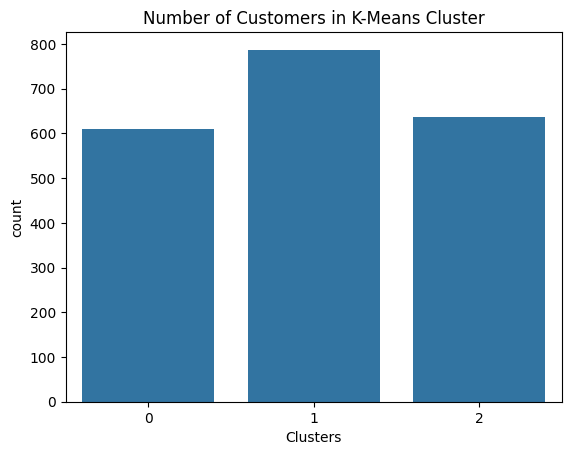

In [65]:
sns.countplot(data = data, x= pd.Series(K_labels))
plt.title("Number of Customers in K-Means Cluster")
plt.xlabel('Clusters');

In [66]:
data['K_cluster'] = -1
data.loc[mask1, 'K_cluster'] = K_labels

In [67]:
len(data[data['K_cluster'] == -1])

19

In [68]:
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,K_cluster
0,0.430252,0,0,0.485651,0.987596,1.492783,1.418362,1.518712,1.466365,1.097966,...,0.979500,0,1,0,0,0,1,0,0,2
1,-0.020626,1,1,0.054317,-1.212251,-0.994179,-1.404816,-0.860222,-0.977111,-0.910669,...,1.168180,0,1,0,0,0,1,0,0,1
2,0.844799,0,0,-0.328827,0.766843,1.114962,0.477579,1.360304,0.566616,0.523325,...,0.424207,0,1,0,0,0,0,1,0,2
3,-1.121230,1,0,-0.328827,-1.212251,-0.393787,-0.693207,-0.063211,-0.530874,-1.032441,...,-1.364300,0,1,0,0,0,0,1,0,1
4,0.435547,1,0,0.981964,0.269433,1.031200,0.430355,0.827636,0.721872,-0.257632,...,-1.018697,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2.082531,1,0,-0.451549,-1.313271,0.326069,-0.758034,-0.186307,-0.977111,-0.421657,...,-0.602562,0,1,0,0,0,0,1,0,1
2047,0.533072,0,1,0.248727,1.048581,1.031200,0.709116,0.773074,1.547793,1.515569,...,0.271477,0,1,0,0,1,0,0,0,2
2048,0.390278,0,0,0.948530,1.185482,1.101724,0.822475,0.610705,0.227925,0.094914,...,-1.018697,0,1,0,0,0,0,0,0,2
2049,0.777929,0,1,-1.473505,0.769433,0.801733,0.813500,1.161524,0.787398,0.812396,...,1.043457,0,0,1,0,0,0,1,0,2


### Hierarchical Clustering

In [69]:
link_ward = linkage(train, method = 'ward')

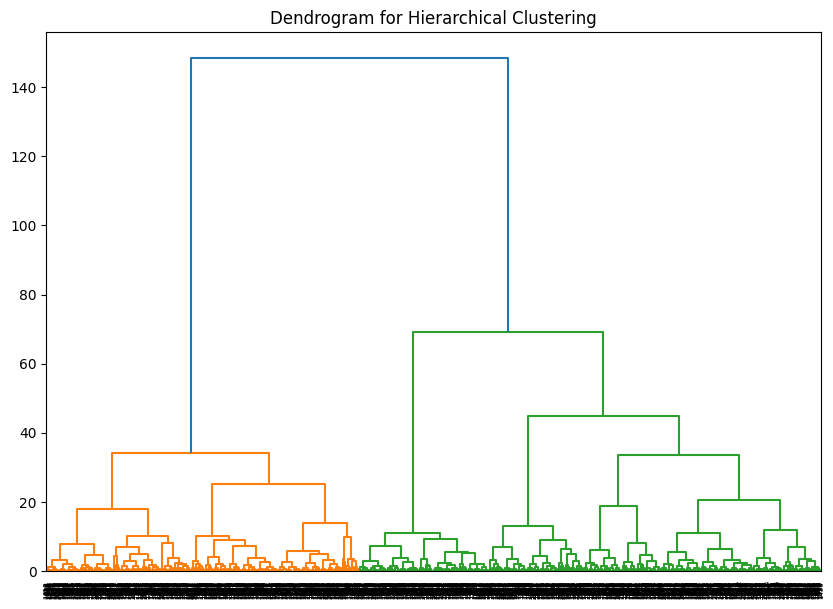

In [70]:
plt.figure(figsize=(10, 7))
plt.title('Dendrogram for Hierarchical Clustering')
dendrogram(link_ward);

In [71]:
ACW = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
ACW_labels = ACW.fit_predict(train)
print(f'Silhouette Score : {silhouette_score(train , ACW_labels)}')
print("Davies-Bouldin Index:", davies_bouldin_score(train, ACW_labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(train, ACW_labels))

Silhouette Score : 0.5320724876497607
Davies-Bouldin Index: 0.6597020175699386
Calinski-Harabasz Index: 3290.243710090091


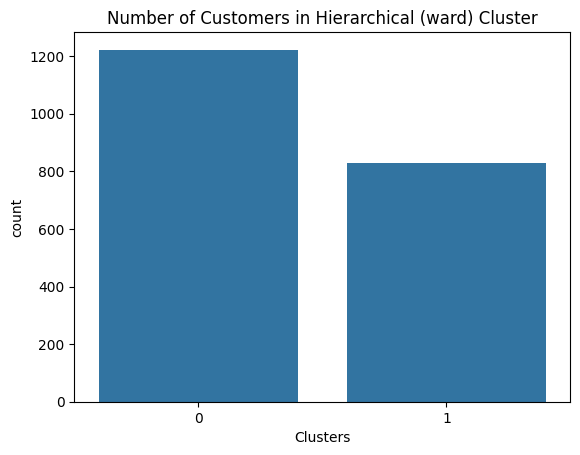

In [72]:
sns.countplot(data = data, x= pd.Series(ACW_labels))
plt.title("Number of Customers in Hierarchical (ward) Cluster")
plt.xlabel('Clusters');

### Birch 

In [73]:
birch = Birch(n_clusters=3)
birch_labels = birch.fit_predict(train)
print(f'Silhouette Score : {silhouette_score(train , birch_labels)}')
print("Davies-Bouldin Index:", davies_bouldin_score(train, birch_labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(train, birch_labels))

Silhouette Score : 0.4275441597372593
Davies-Bouldin Index: 0.6671085245395069
Calinski-Harabasz Index: 2656.6329811902315


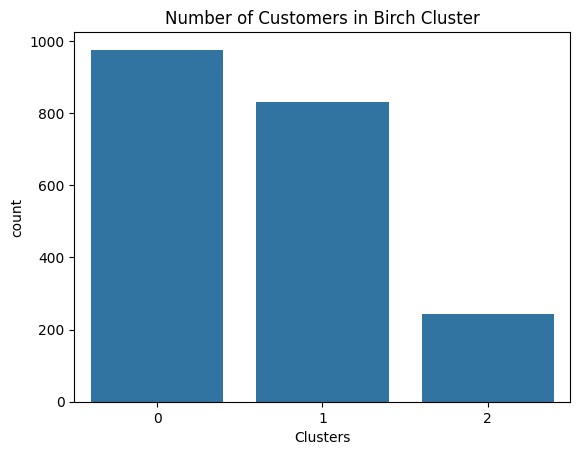

In [74]:
sns.countplot(data = data, x= pd.Series(birch_labels))
plt.title("Number of Customers in Birch Cluster")
plt.xlabel('Clusters');

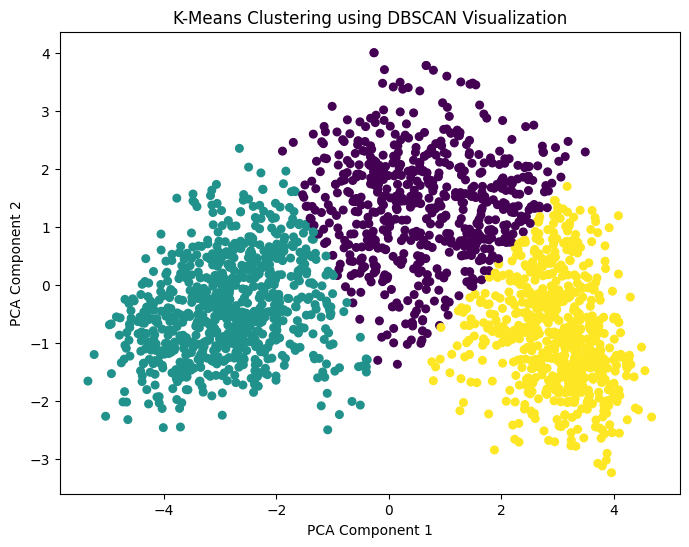

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(train[mask1, 0], train[mask1,1], c = K_labels, s=30)
plt.title("K-Means Clustering using DBSCAN Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2");

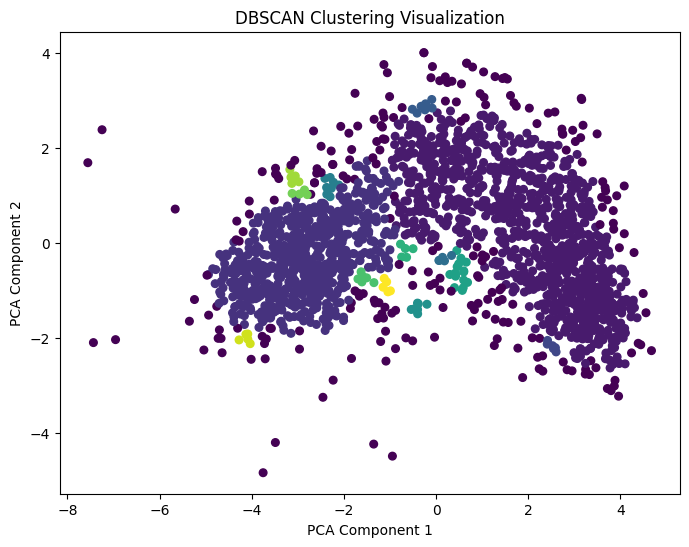

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(train[:,0], train[:,1], c = db_labels, s=30)
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2");

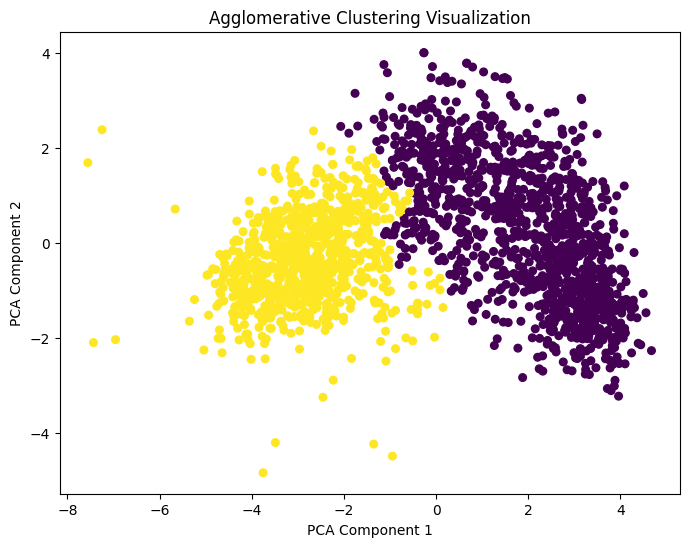

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(train[:,0], train[:,1], c = ACW_labels, s=30)
plt.title("Agglomerative Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2");

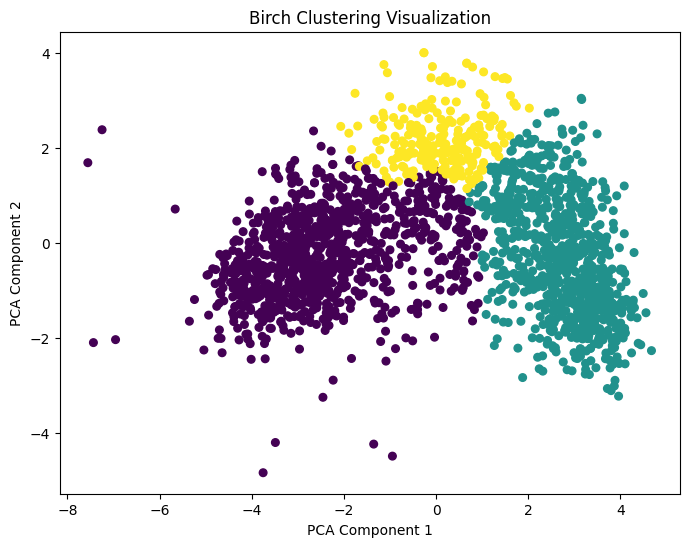

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(train[:,0], train[:,1], c = birch_labels, s=30)
plt.title("Birch Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2");

In [79]:
# Reversing the scaling of data
recovered = sc.inverse_transform(data[scale_col])
recovered_df = pd.DataFrame(recovered, columns=scale_col)

In [80]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'K_cluster'],
      dtype='object')

In [81]:
recovered_df

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,10.970592,4.077537,6.455199,4.488636,6.304449,4.976734,4.488636,4.488636,4.060443,1.386294,2.197225,2.397895,1.609438,2.079442
1,10.743869,3.663562,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,4.110874,1.098612,0.693147,0.693147,1.098612,1.791759
2,11.179046,3.295837,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,3.912023,0.693147,2.197225,1.098612,2.397895,1.609438
3,10.190432,3.295837,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,3.433987,1.098612,1.098612,0.000000,1.609438,1.945910
4,10.973254,4.553877,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,3.526361,1.791759,1.791759,1.386294,1.945910,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,11.801437,3.178054,2.302585,2.708050,2.944439,2.197225,0.693147,2.564949,3.637586,1.609438,1.386294,0.693147,1.386294,1.945910
2047,11.022295,3.850148,6.565265,3.784190,5.209486,3.761200,4.615121,5.017280,3.871201,1.098612,2.302585,1.386294,1.609438,1.791759
2048,10.950491,4.521789,6.812345,3.891820,5.384495,3.496508,2.564949,3.218876,3.526361,0.693147,1.098612,1.386294,2.639057,1.945910
2049,11.145421,2.197225,6.061457,3.433987,5.370638,4.394449,3.433987,4.127134,4.077537,1.098612,1.945910,1.791759,2.397895,1.386294


In [82]:
# Reversing the log transformation of data
recovered_df = np.expm1(recovered_df)

In [83]:
recovered_df

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138.0,58.0,635.0,88.0,546.0,144.0,88.0,88.0,57.0,3.0,8.0,10.0,4.0,7.0
1,46344.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,60.0,2.0,1.0,1.0,2.0,5.0
2,71613.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,49.0,1.0,8.0,2.0,10.0,4.0
3,26646.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,30.0,2.0,2.0,0.0,4.0,6.0
4,58293.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,33.0,5.0,5.0,3.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,133443.0,23.0,9.0,14.0,18.0,8.0,1.0,12.0,37.0,4.0,3.0,1.0,3.0,6.0
2047,61223.0,46.0,709.0,43.0,182.0,42.0,100.0,150.0,47.0,2.0,9.0,3.0,4.0,5.0
2048,56981.0,91.0,908.0,48.0,217.0,32.0,12.0,24.0,33.0,1.0,2.0,3.0,13.0,6.0
2049,69245.0,8.0,428.0,30.0,214.0,80.0,30.0,61.0,58.0,2.0,6.0,5.0,10.0,3.0


In [84]:
# concating all columns that are not scaled
cols = [i for i in data if i not in scale_col]
recovered_df = pd.concat([recovered_df, data[cols]], axis = 1)

In [85]:
recovered_df

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,NumDealsPurchases,...,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,K_cluster
0,58138.0,58.0,635.0,88.0,546.0,144.0,88.0,88.0,57.0,3.0,...,1,0,1,0,0,0,1,0,0,2
1,46344.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,60.0,2.0,...,0,0,1,0,0,0,1,0,0,1
2,71613.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,49.0,1.0,...,0,0,1,0,0,0,0,1,0,2
3,26646.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,30.0,2.0,...,0,0,1,0,0,0,0,1,0,1
4,58293.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,33.0,5.0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,133443.0,23.0,9.0,14.0,18.0,8.0,1.0,12.0,37.0,4.0,...,0,0,1,0,0,0,0,1,0,1
2047,61223.0,46.0,709.0,43.0,182.0,42.0,100.0,150.0,47.0,2.0,...,0,0,1,0,0,1,0,0,0,2
2048,56981.0,91.0,908.0,48.0,217.0,32.0,12.0,24.0,33.0,1.0,...,0,0,1,0,0,0,0,0,0,2
2049,69245.0,8.0,428.0,30.0,214.0,80.0,30.0,61.0,58.0,2.0,...,0,0,0,1,0,0,0,1,0,2


In [86]:
# Total accepted campaign
recovered_df['AcceptedCmpTotal'] = recovered_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                                 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [87]:
# Total money spend on various products
recovered_df['TotalMntprod'] = recovered_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                         'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [88]:
# Displays all columns
pd.set_option('display.max_columns', None)

In [89]:
# Analyzing the K_means clusters
filtered_df = recovered_df[recovered_df['K_cluster'] != -1]
K_means_summary = filtered_df.groupby('K_cluster').mean().reset_index()
pd.DataFrame(K_means_summary)

,K_cluster,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,AcceptedCmpTotal,TotalMntprod
0,0,54104.444992,49.878489,388.108374,15.254516,112.775041,21.371100,15.362890,49.840722,48.610837,3.871921,5.781609,2.599343,6.679803,6.221675,0.376026,0.837438,0.080460,0.133005,0.024631,0.037767,0.018062,0.004926,0.146141,0.003284,0.467980,0.198686,0.259442,0.382594,0.183908,0.256158,0.047619,0.293924,602.712644
1,1,32791.766201,48.350699,26.006353,3.705210,16.132147,5.054638,4.078780,12.252859,41.822109,1.843710,1.898348,0.412961,2.931385,6.440915,0.822109,0.434562,0.068615,0.010165,0.000000,0.000000,0.001271,0.013977,0.085133,0.059720,0.475222,0.153748,0.199492,0.398983,0.236341,0.249047,0.020330,0.080051,67.229987
2,2,73514.993711,49.064465,571.930818,54.940252,377.988994,82.158805,56.591195,69.020440,46.077044,1.400943,5.253145,5.504717,8.509434,3.007862,0.042453,0.284591,0.072327,0.105346,0.207547,0.172956,0.022013,0.009434,0.238994,0.000000,0.569182,0.150943,0.194969,0.385220,0.231132,0.251572,0.040881,0.580189,1212.630503


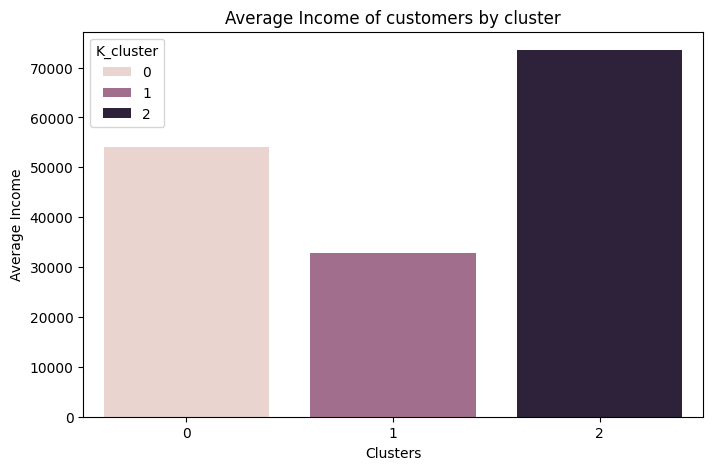

In [90]:
plt.figure(figsize=(8,5))
sns.barplot(data = K_means_summary, x='K_cluster', y = 'Income', hue = 'K_cluster')
plt.xlabel('Clusters')
plt.ylabel('Average Income')
plt.title('Average Income of customers by cluster');

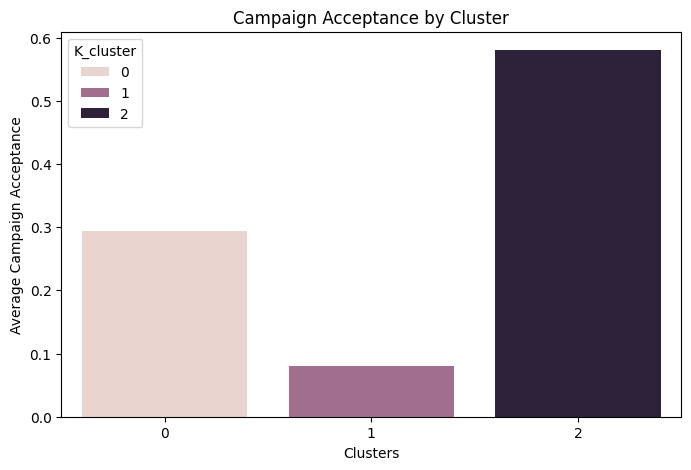

In [91]:
plt.figure(figsize=(8,5))
sns.barplot(data = K_means_summary, x='K_cluster', y='AcceptedCmpTotal', hue = 'K_cluster')
plt.xlabel('Clusters')
plt.ylabel('Average Campaign Acceptance')
plt.title('Campaign Acceptance by Cluster');

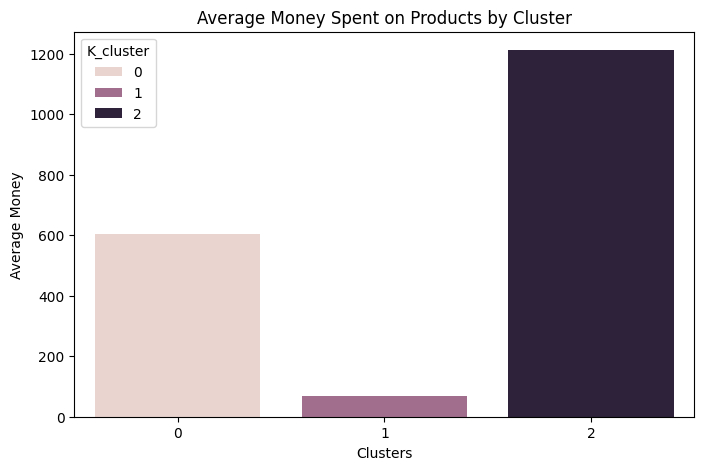

In [92]:
plt.figure(figsize=(8,5))
sns.barplot(data = K_means_summary, x='K_cluster', y='TotalMntprod', hue = 'K_cluster')
plt.title('Average Money Spent on Products by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Average Money');

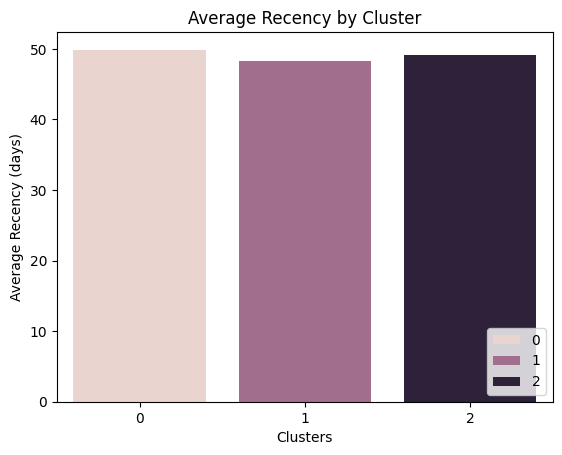

In [93]:
sns.barplot(data=K_means_summary, x='K_cluster', y='Recency', hue = 'K_cluster')
plt.title('Average Recency by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Average Recency (days)')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0));

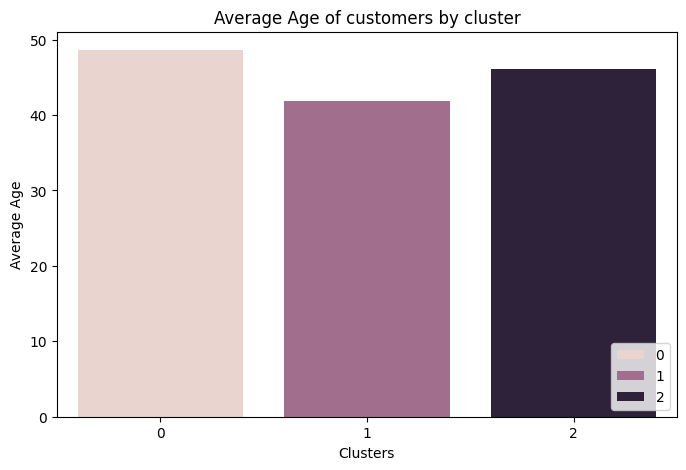

In [94]:
plt.figure(figsize=(8,5))
sns.barplot(data = K_means_summary, x='K_cluster', y = 'Age', hue = 'K_cluster')
plt.xlabel('Clusters')
plt.ylabel('Average Age')
plt.title('Average Age of customers by cluster')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0));

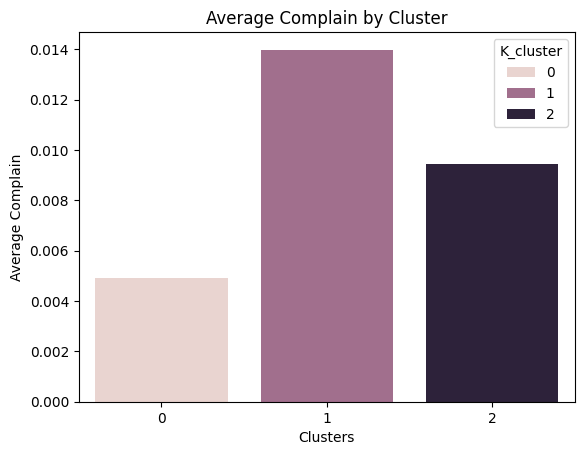

In [95]:
sns.barplot(data = K_means_summary, x='K_cluster', y='Complain', hue = 'K_cluster')
plt.title('Average Complain by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Average Complain');

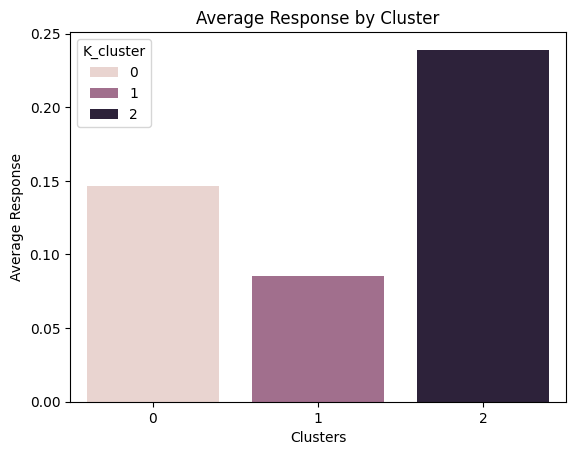

In [96]:
sns.barplot(data=K_means_summary, x='K_cluster', y='Response', hue = 'K_cluster')
plt.title('Average Response by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Average Response');

### PIPELINE 

In [97]:
categorical_cols = ['Marital_Status', 'Education']
numerical_cols = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'Age', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first")

numeric_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p)),
    ('scale', StandardScaler())
])

preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
  ], remainder = 'passthrough') # Ignores other column that are not specified 

prep_pca_pipeline = Pipeline(steps = [
    ('pre', preprocessor),
    ('pca', PCA(n_components = 2))
])
X_transformed = prep_pca_pipeline.fit_transform(pipe_df)

In [98]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_transformed)

# Mask for inliers (not -1)
inlier_mask = db_labels != -1
X_inliers = X_transformed[inlier_mask]

# KMeans on inliers only
kmeans1 = KMeans(n_clusters=3, random_state=42)
kmeans1 = kmeans1.fit(X_inliers)
kmeans_labels = kmeans1.predict(X_inliers)

In [99]:
print("Silhouette Score :", silhouette_score(X_inliers, kmeans_labels))

Silhouette Score : 0.5106067569358312


In [100]:
# recovered_df.drop('Response', axis = 1).to_csv('E://cluster_data.csv', index = False)

In [101]:
# Saving the preprocess model
# model_path = r'E:\Customer seg models\preprocess_model.pkl'  # Modify Path as your preference
# with open(model_path, 'wb') as file:
#     pickle.dump(prep_pca_pipeline, file)

In [102]:
# Saving the K-Means model
# model_path1 = r'E:\Customer seg models\K_means_model.pkl'  # Modify Path as your preference
# with open(model_path1, 'wb') as file:
#     pickle.dump(kmeans1, file)

In [103]:
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,K_cluster
0,0.430252,0,0,0.485651,0.987596,1.492783,1.418362,1.518712,1.466365,1.097966,0.646952,1.277200,1.807876,-0.385410,0.705365,0,0,0,0,0,0,1,0.979500,0,1,0,0,0,1,0,0,2
1,-0.020626,1,1,0.054317,-1.212251,-0.994179,-1.404816,-0.860222,-0.977111,-0.910669,0.036820,-1.397163,-0.406354,-1.431835,0.088351,0,0,0,0,0,0,0,1.168180,0,1,0,0,0,1,0,0,1
2,0.844799,0,0,-0.328827,0.766843,1.114962,0.477579,1.360304,0.566616,0.523325,-0.823112,1.277200,0.120289,1.229744,-0.302688,0,0,0,0,0,0,0,0.424207,0,1,0,0,0,0,1,0,2
3,-1.121230,1,0,-0.328827,-1.212251,-0.393787,-0.693207,-0.063211,-0.530874,-1.032441,0.036820,-0.676216,-1.306655,-0.385410,0.418970,0,0,0,0,0,0,0,-1.364300,0,1,0,0,0,0,1,0,1
4,0.435547,1,0,0.981964,0.269433,1.031200,0.430355,0.827636,0.721872,-0.257632,1.506884,0.556253,0.493948,0.303853,0.088351,0,0,0,0,0,0,0,-1.018697,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2.082531,1,0,-0.451549,-1.313271,0.326069,-0.758034,-0.186307,-0.977111,-0.421657,1.120207,-0.164695,-0.406354,-0.842519,0.418970,0,0,0,0,0,0,0,-0.602562,0,1,0,0,0,0,1,0,1
2047,0.533072,0,1,0.248727,1.048581,1.031200,0.709116,0.773074,1.547793,1.515569,0.036820,1.464539,0.493948,-0.385410,0.088351,0,0,0,0,0,0,0,0.271477,0,1,0,0,1,0,0,0,2
2048,0.390278,0,0,0.948530,1.185482,1.101724,0.822475,0.610705,0.227925,0.094914,-0.823112,-0.676216,0.493948,1.723765,0.418970,0,1,0,0,0,0,0,-1.018697,0,1,0,0,0,0,0,0,2
2049,0.777929,0,1,-1.473505,0.769433,0.801733,0.813500,1.161524,0.787398,0.812396,0.036820,0.830344,1.020590,1.229744,-0.781281,0,0,0,0,0,0,0,1.043457,0,0,1,0,0,0,1,0,2


In [104]:
# train_df = pd.DataFrame(train, columns = ['PCA1', 'PCA2'])

In [105]:
# train_df.to_csv('E://Customer_Seg.csv', index = False)